In [1]:
    #Load Library
library(plyr)
library(readr)
library(dplyr)
library(caret)
library(ggplot2)
library(repr)
library(lmtest)
library(car)
library(EnvStats)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode



Attaching package: 'EnvStats'


The following object is masked from 'package:car':

    qqPlot


The following objects are masked from 'package:stats':

    predict, predict.lm


The following object is masked from 'package:base':

    print.default




In [2]:
##Dataset
data <- readr::read_csv("BPS_Jateng_2021.csv")
data

Rows: 35 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Kab_Kota
dbl (6): Y, X1, X2, X3, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Kab_Kota,Y,X1,X2,X3,X4,X5
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cilacap,11.67,44.52,11.73,0.24,0.13,1.60
Banyumas,13.66,48.79,21.10,0.10,0.33,1.78
Purbalingga,16.24,50.50,13.67,0.19,0.35,0.60
Banjarnegara,16.23,40.52,9.29,0.62,0.24,0.75
Kebumen,17.83,53.29,12.14,0.13,0.38,0.90
Purworejo,12.40,40.33,20.86,0.04,0.20,0.57
Wonosobo,17.67,47.40,11.47,0.00,0.00,0.14
Magelang,11.91,40.65,13.73,1.19,0.15,0.72
Boyolali,10.62,41.61,20.40,0.18,0.27,1.43


In [3]:
cols = c("Y",'X1', 'X2', 'X3', 'X4', 'X5')
dataset = as.matrix(data[,cols])
dataset1= as.data.frame(dataset)
dataset1

Y,X1,X2,X3,X4,X5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.67,44.52,11.73,0.24,0.13,1.60
13.66,48.79,21.10,0.10,0.33,1.78
16.24,50.50,13.67,0.19,0.35,0.60
16.23,40.52,9.29,0.62,0.24,0.75
17.83,53.29,12.14,0.13,0.38,0.90
12.40,40.33,20.86,0.04,0.20,0.57
17.67,47.40,11.47,0.00,0.00,0.14
11.91,40.65,13.73,1.19,0.15,0.72
10.62,41.61,20.40,0.18,0.27,1.43


In [4]:
summary(data)

   Kab_Kota               Y                X1              X2       
 Length:35          Min.   : 4.560   Min.   :30.05   Min.   : 9.29  
 Class :character   1st Qu.: 8.415   1st Qu.:39.23   1st Qu.:12.02  
 Mode  :character   Median :10.680   Median :43.77   Median :16.70  
                    Mean   :11.393   Mean   :43.47   Mean   :20.32  
                    3rd Qu.:13.575   3rd Qu.:48.46   3rd Qu.:24.68  
                    Max.   :17.830   Max.   :65.05   Max.   :43.26  
       X3               X4               X5       
 Min.   : 0.000   Min.   :0.0000   Min.   :0.110  
 1st Qu.: 0.125   1st Qu.:0.1650   1st Qu.:0.815  
 Median : 0.450   Median :0.2500   Median :1.190  
 Mean   : 9.300   Mean   :0.4197   Mean   :1.754  
 3rd Qu.: 2.355   3rd Qu.:0.5100   3rd Qu.:2.190  
 Max.   :81.650   Max.   :2.1300   Max.   :6.110  

In [5]:
library(corrplot)
library(Hmisc)
matriks<-rcorr(as.matrix(dataset))
matriks

corrplot 0.92 loaded


Attaching package: 'Hmisc'


The following object is masked from 'package:EnvStats':

    stripChart


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:base':

    format.pval, units




       Y    X1    X2    X3    X4    X5
Y   1.00  0.53 -0.72 -0.15 -0.59 -0.50
X1  0.53  1.00 -0.42 -0.26 -0.20 -0.20
X2 -0.72 -0.42  1.00  0.10  0.76  0.59
X3 -0.15 -0.26  0.10  1.00  0.09  0.07
X4 -0.59 -0.20  0.76  0.09  1.00  0.56
X5 -0.50 -0.20  0.59  0.07  0.56  1.00

n= 35 


P
   Y      X1     X2     X3     X4     X5    
Y         0.0010 0.0000 0.3846 0.0002 0.0020
X1 0.0010        0.0124 0.1342 0.2599 0.2610
X2 0.0000 0.0124        0.5602 0.0000 0.0002
X3 0.3846 0.1342 0.5602        0.5955 0.7052
X4 0.0002 0.2599 0.0000 0.5955        0.0004
X5 0.0020 0.2610 0.0002 0.7052 0.0004       

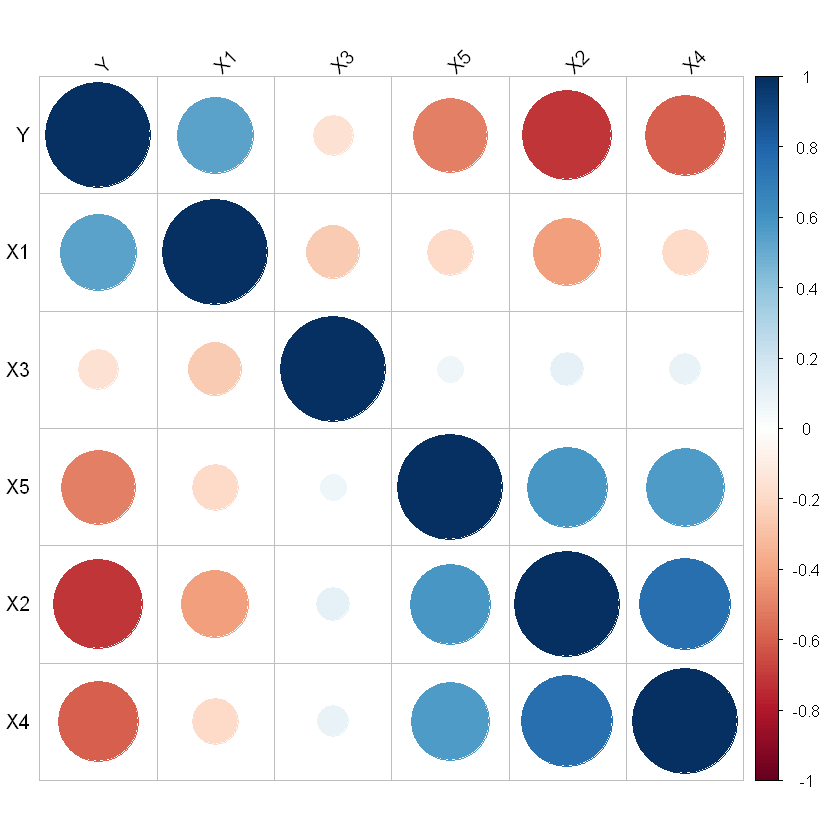

In [6]:
matriks<-cor(dataset)
# grafik standar (method="circle"), type="full"
corrplot(matriks,order = "hclust", # mengurutkan berdasarkan hierarchical clustering
         tl.col= "black", # warna tulisan
         tl.srt= 45, # kemiringan tulisan 45 derajat
         method = "circle") # Bentuk Visualisasi

In [7]:
## Membuat fungsi dengan nama fattenCorrMatrix
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut], # matriks korelasi
    p = pmat[ut] # matriks p-value
  )
}

# menjalankan fungsi
matriks<-rcorr(as.matrix(dataset))
flattenCorrMatrix(matriks$r,matriks$P)

row,column,cor,p
<chr>,<chr>,<dbl>,<dbl>
Y,X1,0.53295401,9.798907e-04
Y,X2,-0.71836629,1.178345e-06
X1,X2,-0.41823825,1.240994e-02
Y,X3,-0.15162359,3.845832e-01
X1,X3,-0.25820838,1.342288e-01
X2,X3,0.10191557,5.601870e-01
Y,X4,-0.59495464,1.635674e-04
X1,X4,-0.19568201,2.599284e-01
X2,X4,0.75617910,1.492652e-07


In [8]:
MLR = lm(Y~ X1+X2+X3+X4+X5, data = dataset1)
MLR


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5, data = dataset1)

Coefficients:
(Intercept)           X1           X2           X3           X4           X5  
   8.746663     0.150766    -0.138509    -0.001234    -1.358418    -0.292137  


In [9]:
summary(MLR)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5, data = dataset1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8275 -1.0110 -0.1765  1.6562  3.5852 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  8.746663   3.508745   2.493   0.0186 *
X1           0.150766   0.065058   2.317   0.0277 *
X2          -0.138509   0.073646  -1.881   0.0701 .
X3          -0.001234   0.019807  -0.062   0.9507  
X4          -1.358418   1.444557  -0.940   0.3548  
X5          -0.292137   0.357683  -0.817   0.4207  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.409 on 29 degrees of freedom
Multiple R-squared:  0.6085,	Adjusted R-squared:  0.541 
F-statistic: 9.016 on 5 and 29 DF,  p-value: 2.947e-05
